# Linear Regression example using scikit learning

In [1]:
import numpy as np
random_data = np.random.random((20,2))
random_data

array([[0.12447699, 0.113789  ],
       [0.71796471, 0.92470382],
       [0.45282246, 0.33283895],
       [0.55542992, 0.09806618],
       [0.3366655 , 0.54501803],
       [0.36188931, 0.51881356],
       [0.62970177, 0.12587987],
       [0.44654768, 0.43535603],
       [0.04915904, 0.29555463],
       [0.53352989, 0.10676388],
       [0.43602497, 0.60014928],
       [0.58502125, 0.42708037],
       [0.94820146, 0.6839692 ],
       [0.36448641, 0.90040581],
       [0.28284837, 0.49985813],
       [0.30982283, 0.52181112],
       [0.84707493, 0.26231787],
       [0.44975958, 0.07698515],
       [0.99220503, 0.64119045],
       [0.13153476, 0.76291102]])

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
x = random_data[:,0]
y = random_data[:,1]

In [12]:
def assuming_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化
    return 15.5*x + 5 + 5*(np.random.random()-0.5)

In [13]:
y1 = [assuming_function(x_i) for x_i in x]

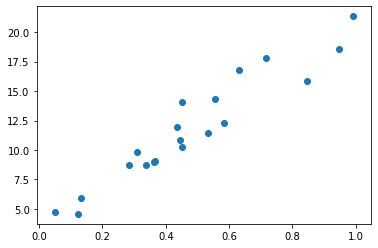

In [14]:
plt.figure(1)
plt.scatter(x,y1)

In [16]:
x

array([0.12447699, 0.71796471, 0.45282246, 0.55542992, 0.3366655 ,
       0.36188931, 0.62970177, 0.44654768, 0.04915904, 0.53352989,
       0.43602497, 0.58502125, 0.94820146, 0.36448641, 0.28284837,
       0.30982283, 0.84707493, 0.44975958, 0.99220503, 0.13153476])

In [17]:
x = x.reshape(-1,1) #将x换成n行一维的二维矩阵

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x,y1)

In [20]:
reg.score(x,y1)  #相当于loss函数

0.9120740888593694

In [21]:
reg.coef_  #y=wx+b 中的比例系数w

array([17.03156574])

In [22]:
reg.intercept_ #截距

3.659955356413775

In [23]:
def new_f(x):
    return reg.coef_ * x + reg.intercept_

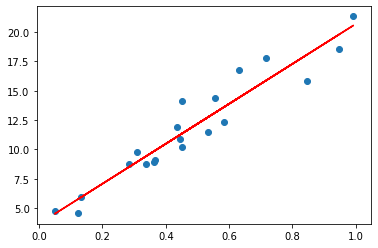

In [24]:
plt.figure(2)
plt.scatter(x,y1)
plt.plot(x,new_f(x), color='red')

# How to implement a KNN model

In [31]:
def model_connect(x,y):
    return [(xi,yi) for xi, yi in zip(x,y)]

In [32]:
from scipy.spatial.distance import cosine

def distance(v1,v2):
    return cosine(v1,v2)

In [43]:
data_connect = model_connect(x,y1)
data_connect

[(array([0.12447699]), 4.59274701248248),
 (array([0.71796471]), 17.773004870778237),
 (array([0.45282246]), 10.220604444902165),
 (array([0.55542992]), 14.340741248729692),
 (array([0.3366655]), 8.716334720968094),
 (array([0.36188931]), 8.948254685225177),
 (array([0.62970177]), 16.76309439463437),
 (array([0.44654768]), 10.842410890857225),
 (array([0.04915904]), 4.711787951648173),
 (array([0.53352989]), 11.48262454242627),
 (array([0.43602497]), 11.925672849911868),
 (array([0.58502125]), 12.290820475816783),
 (array([0.94820146]), 18.525751880877312),
 (array([0.36448641]), 9.063955124331425),
 (array([0.28284837]), 8.757713343950888),
 (array([0.30982283]), 9.802585240158077),
 (array([0.84707493]), 15.838136077353166),
 (array([0.44975958]), 14.101020632395159),
 (array([0.99220503]), 21.331708114726613),
 (array([0.13153476]), 5.90959126748711)]

In [92]:
from collections import Counter
from collections import defaultdict
def knn(x_test, k=5):
    most_similars = sorted(data_connect, key=lambda data:distance(data[0],x_test),reverse=True)
    most_similars = most_similars[:k] # 获得了最相似的k个数据集
    target = most_similars
    #most_similars = {list(k):v for k,v in most_similars}
   # most_similars_dict = defaultdict(int)  
    #most_similars_dict.update(most_similars)
   # target = Counter(most_similars_dict).most_common() #Counter() -> most_common() -> 就可以获得出现最多的这个y了
    return target[1]

In [93]:
knn([0.2])

(array([0.44654768]), 10.842410890857225)

In [70]:
from scipy.spatial.distance import cosine
cosine([0,1],[1,0])

1.0

In [71]:
cosine([1,0],[1,0])

0.0

# 作业指导

In [95]:
fname = 'D:\code_project\datasource\export_sql_1558435\sqlResult_1558435.csv'
import pandas as pd
content = pd.read_csv(fname, encoding='gb18030')
content.head()

D:\xuhui\program64\Anaconda\envs\pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [96]:
len(content)

89611

In [97]:
xinhua_news = content[content['source']==u'新华社']
len(xinhua_news)/len(content)

0.8778051801676133

## 新华社新闻抄袭自动判别
1. 构建一个机器学习模型，判断这个文章是不是新华社的
2. 当这个模型的acc 大于 0.8778， recall， precision，f1等值都较高的时候
3. 用该模型 判断一篇文章是否是新华社的文章，如果判断出来是新华社的，但是，它的source并不是新华社的，那么，我们就说，这个文章是抄袭的新华社的文章
Text Representation uses "https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html"
